<a href="https://colab.research.google.com/github/codemuse-bcka777/netflix-recommendation-system/blob/main/Netflix_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

loading the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hands-on project practices/netflix recommendation system/netflix_titles.csv')

viewing the dataset

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


cleaning and preprocessing

In [ ]:
 #filling missing values
 df.fillna('', inplace=True)

visualising the dataset

CONTENT TYPE DISTRIBUTION

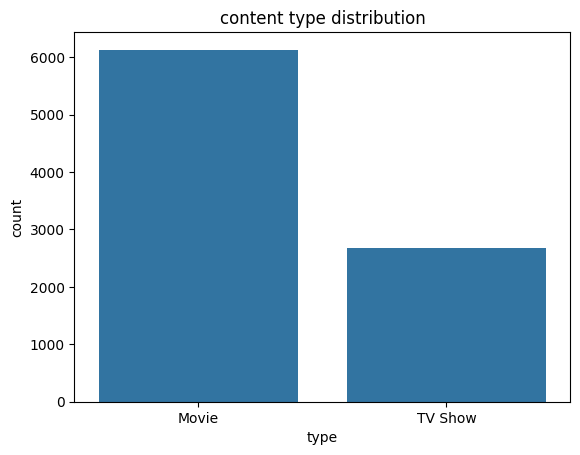

In [ ]:
sns.countplot(data=df,x='type')
plt.title("content type distribution")
plt.show()

TOP GENRES

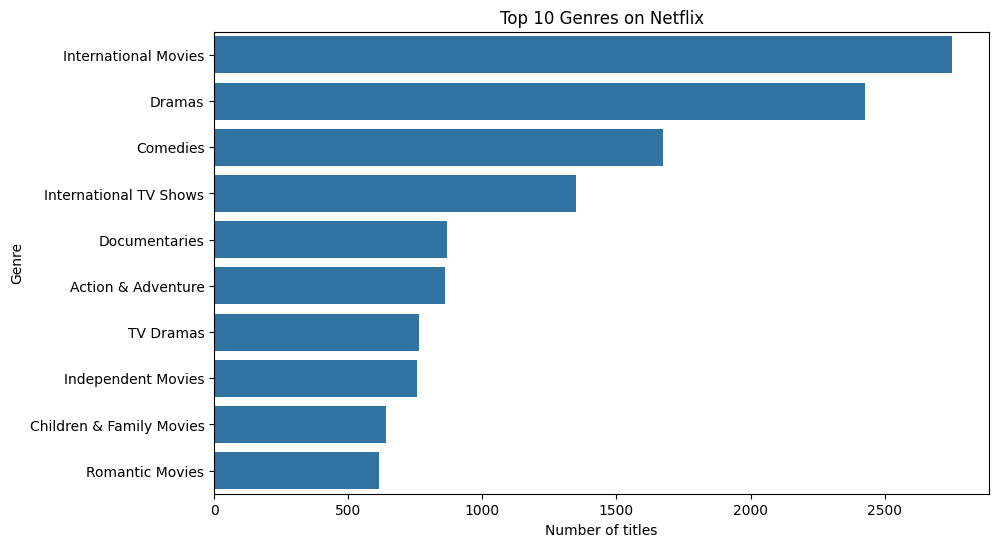

In [ ]:
genre_list=df['listed_in'].str.split(', ')
flat_genres=[genre for sublist in genre_list for genre in sublist]
genre_counts=Counter(flat_genres)
top_genres=dict(genre_counts.most_common(10))

plt.figure(figsize=(10,6))
sns.barplot(x=list(top_genres.values()),y=list(top_genres.keys()))
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of titles")
plt.ylabel("Genre")
plt.show()

TOP 10 DIRECTORS

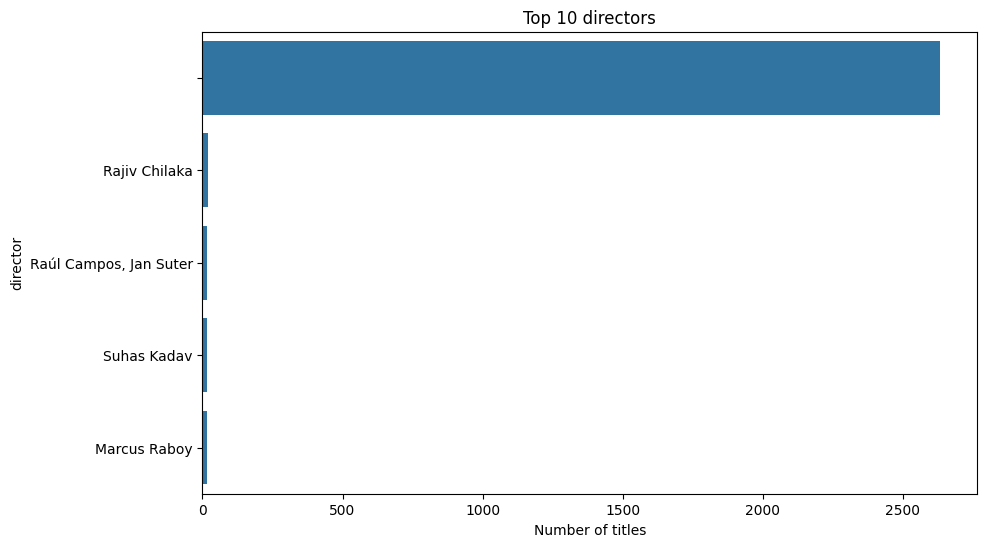

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 directors")
plt.xlabel("Number of titles")
plt.ylabel("director")
plt.show()

TITLES BY YEAR

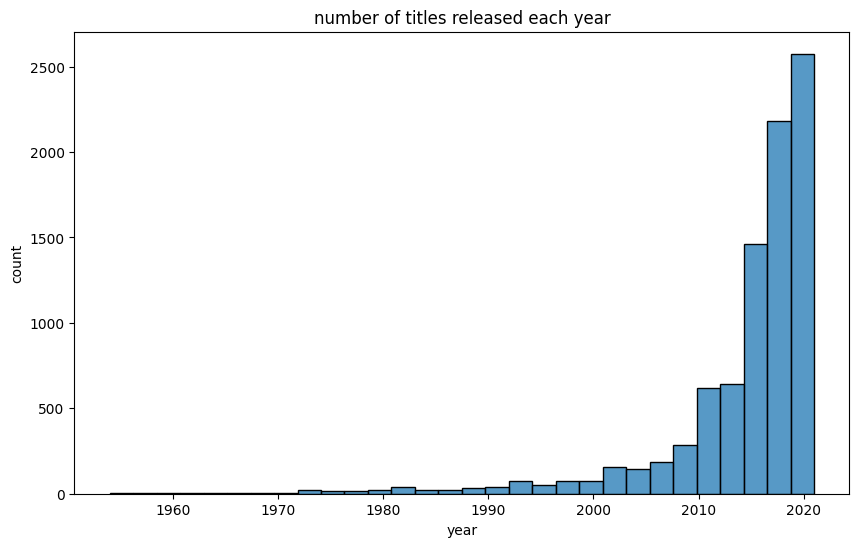

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df['release_year']>1950],x='release_year',bins=30)
plt.title("number of titles released each year")
plt.xlabel("year")
plt.ylabel("count")
plt.show()


Feature Engineering

In [ ]:
df['combined_features'] = (
    df['title'] + ' ' +
    df['director'] + ' ' +
    df['cast'] + ' ' +
    df['listed_in'] + ' ' +
    df['description']
).str.lower()

TF-IDF vectorization and similarity

In [ ]:
#vectorize
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix=tfidf.fit_transform(df['combined_features'])

#similarity matrix
cosine_sim=cosine_similarity(tfidf_matrix,tfidf_matrix)

Recommendation function

In [ ]:
def recommend(title, cosine_sim=cosine_sim):
    title = title.lower()
    if title not in indices:
        return "Sorry, this title doesn't exist in the dataset."

    idx = indices[title]

    # Get pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort by similarity score (highest first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Skip the first one (the show itself), get next 10
    sim_scores = sim_scores[1:11]

    # Print the recommendations with similarity score
    print(f"\n📺 Recommendations for: **{title.title()}**\n")
    for i, score in sim_scores:
        print(f"{df['title'].iloc[i]} — Similarity Score: {score:.2f}")


In [ ]:
recommend("Breaking Bad")



📺 Recommendations for: **Breaking Bad**

Better Call Saul — Similarity Score: 0.25
El Camino: A Breaking Bad Movie — Similarity Score: 0.15
The Show — Similarity Score: 0.14
W/ Bob & David — Similarity Score: 0.11
The Lincoln Lawyer — Similarity Score: 0.11
Girlfriend's Day — Similarity Score: 0.10
Have You Ever Fallen in Love, Miss Jiang? — Similarity Score: 0.10
Get Shorty — Similarity Score: 0.10
Extracurricular — Similarity Score: 0.09
Refresh Man — Similarity Score: 0.09


In [ ]:
recommend("money heist")

"Sorry, this title doesn't exist in the dataset."